<a href="https://colab.research.google.com/github/FreeOfConfines/ExampleNNWithKerasAndTensorflow/blob/master/Convolutional_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(trImages, trLabels), (tImages, tLabels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
label_dict = {
 0: "T-shirt/top",
 1: "Trouser",
 2: "Pullover",
 3: "Dress",
 4: "Coat",
 5: "Sandal",
 6: "Shirt",
 7: "Sneaker",
 8: "Bag",
 9: "Ankle boot"
}

W0714 06:53:16.842840 140416678848384 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
L0-Conv2D (Conv2D)           (None, 28, 28, 10)        100       
_________________________________________________________________
L1-Conv2D (Conv2D)           (None, 28, 28, 20)        1820      
_________________________________________________________________
lambda (Lambda)              (None, 28, 28, 1)         0         
_________________________________________________________________
Flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
Logistic (Dense)             (None, 10)                7850      
Total params: 9,770
Trainable params: 9,770
Non-trainable params: 0
_________________________________________________________________


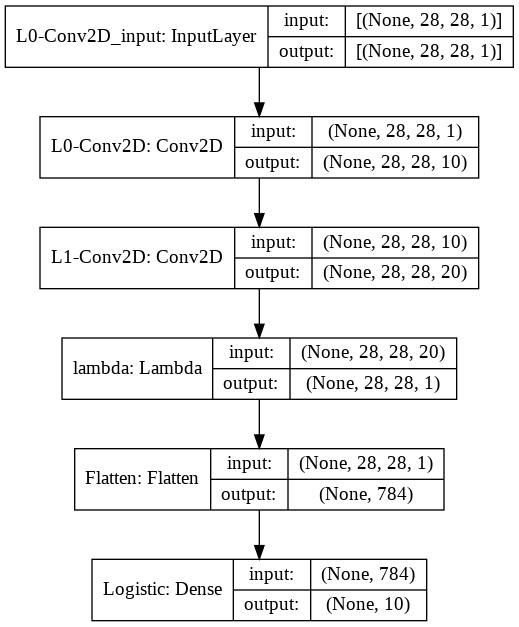

In [4]:
# Building a feed-forward network

model = tf.keras.Sequential() # empty model

# Conv Layer
nFilters = 10
sizeKernel = (3,3)
nStride = 1
dataFormat = 'channels_last'
layer0 = tf.keras.layers.Conv2D(filters=nFilters, kernel_size=sizeKernel, strides=nStride, 
                                data_format=dataFormat, activation=tf.nn.relu,use_bias=True, 
                                input_shape=(28,28,1), padding='same', name='L0-Conv2D')
model.add(layer0)

#layerMP0 = tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2,data_format=dataFormat)
#model.add(layerMP0)
nFilters = 20
sizeKernel = (3,3)
layer0p1 = tf.keras.layers.Conv2D(filters=nFilters, kernel_size=sizeKernel, strides=nStride, 
                                data_format=dataFormat, activation=tf.nn.relu,use_bias=True, 
                                padding='same', name='L1-Conv2D')
model.add(layer0p1)

nFilters = 30
sizeKernel = (3,3)
#layer0p2 = tf.keras.layers.Conv2D(filters=nFilters, kernel_size=sizeKernel, strides=nStride, 
#                                data_format=dataFormat, activation=tf.nn.relu,use_bias=True, 
#                                padding='same', name='L2-Conv2D')
#model.add(layer0p2)

#layerMP1 = tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2,data_format=dataFormat)
#layerMP1 = tf.reduce_max(input_tensor=layer0p2.output, axis=0,keepdims=True,name='MaxPoolAcrossChannels')
layerMP1 = tf.keras.layers.Lambda(lambda X:tf.reduce_max(input_tensor=X, axis=3,keepdims=True))
model.add(layerMP1)

# Flatten layer
model.add(tf.keras.layers.Flatten(name='Flatten'))

# Layer1 is the output layer
numUnits_L1 = 10
layer1 = tf.keras.layers.Dense(units=numUnits_L1, activation=tf.nn.softmax, use_bias=True, name='Logistic')
model.add(layer1)

# Compile model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy']) #'sparse_categorical_crossentropy'


# Plot Logistic Regression Network
model.summary()
tf.keras.utils.plot_model(model,show_shapes=True,show_layer_names=True)

In [0]:
# Normalizing input (this step doesn't seem to be critical)
trImages = trImages/255.0
tImages = tImages/255.0

# Training Parameters
batchSize = 128
nEpochs = 100

# Train the model
trImages = trImages.reshape([-1,28,28,1])

# Print Weights during training
print_weights = keras.callbacks.LambdaCallback(on_epoch_begin=lambda epoch, 
                                               logs: print(model.layers[0].get_weights()[1]),
                                              on_epoch_end=lambda epoch,
                                              logs: print("-----------------------------"))

trHistory = model.fit(x=trImages, y=trLabels, epochs=nEpochs,shuffle=True, 
                      validation_split=0.1, batch_size=batchSize,verbose=2, 
                      callbacks=[print_weights])


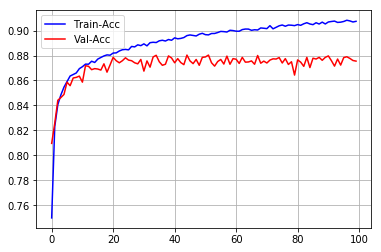

In [6]:
plt.figure(1)
plt.plot(trHistory.history['acc'],'b-',label='Train-Acc')
plt.plot(trHistory.history['val_acc'],'r-', label='Val-Acc')
plt.grid(True)
plt.legend()
plt.show()

In [8]:
tImages = tImages.reshape([-1,28,28,1])
tPrediction = model.predict(tImages, steps=1) # output is a matrix of probabilities where each row corresponds to an image in the Test Set
print(np.shape(tPrediction))

idCount = 0
nErrs = 0
for _ in tPrediction:
  #print(idCount)
  predictedLabel = np.argmax(_)
  if predictedLabel != tLabels[idCount]:
    nErrs += 1
    ''''
    plt.imshow(tImages[idCount,:,:,0])
    print("Id # =", idCount)
    print("nErrs =", nErrs)
    print("Prob =", np.sort(_)[-2:])
    print("Predicted Label=", label_dict[predictedLabel])
    print("True Label=", label_dict[tLabels[idCount]])
    plt.show()
    '''
    
  idCount += 1

print(nErrs)
errRate = nErrs / float(np.shape(tImages)[0])
print("Prediction Error = %f" %errRate)
print("Accuracy Rate = %f" %(1-errRate))

(10000, 10)
1081
Prediction Error = 0.108100
Accuracy Rate = 0.891900


In [0]:
weightsL0 = model.layers[0].get_weights()
for _ in range(np.shape(weightsL0[0])[-1]):
  weightsL0[0][:,:,:,_] = 2 #weightsL0[0][:,:,:,0]
print(weightsL0[0])
model.layers[0].set_weights(weightsL0)
print(model.layers[0].get_weights())

[[[[2. 2. 2. 2. 2.]]

  [[2. 2. 2. 2. 2.]]

  [[2. 2. 2. 2. 2.]]]]
[array([[[[2., 2., 2., 2., 2.]],

        [[2., 2., 2., 2., 2.]],

        [[2., 2., 2., 2., 2.]]]], dtype=float32), array([0., 0., 0., 0., 0.], dtype=float32)]


In [0]:
print(model.layers[0].get_weights())

[array([[[[-0.6739625 , -0.42660952,  0.88938475,  0.73986167,
           0.827868  ]],

        [[ 1.0594708 ,  0.8062747 ,  0.24978538,  0.79583985,
           0.7163719 ]],

        [[-0.3859694 ,  0.01247251,  0.8545602 ,  0.05105817,
           0.9611795 ]]]], dtype=float32), array([-2.4303582e-03,  5.6832071e-02, -1.2293659e+00, -1.8267089e-04,
       -7.9523098e-01], dtype=float32)]


(1, 28, 28, 1)


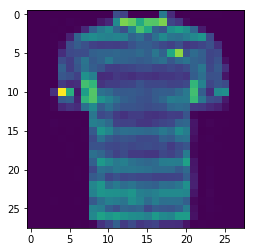

---------------------Layer= 0 Output-------------------------------------------
(1, 28, 28, 10)
10 5


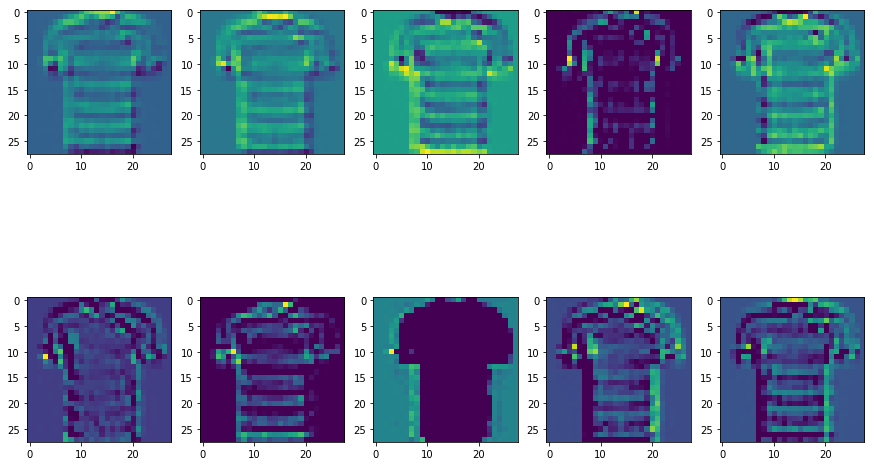

---------------------Layer= 1 Output-------------------------------------------
(1, 28, 28, 20)
20 5


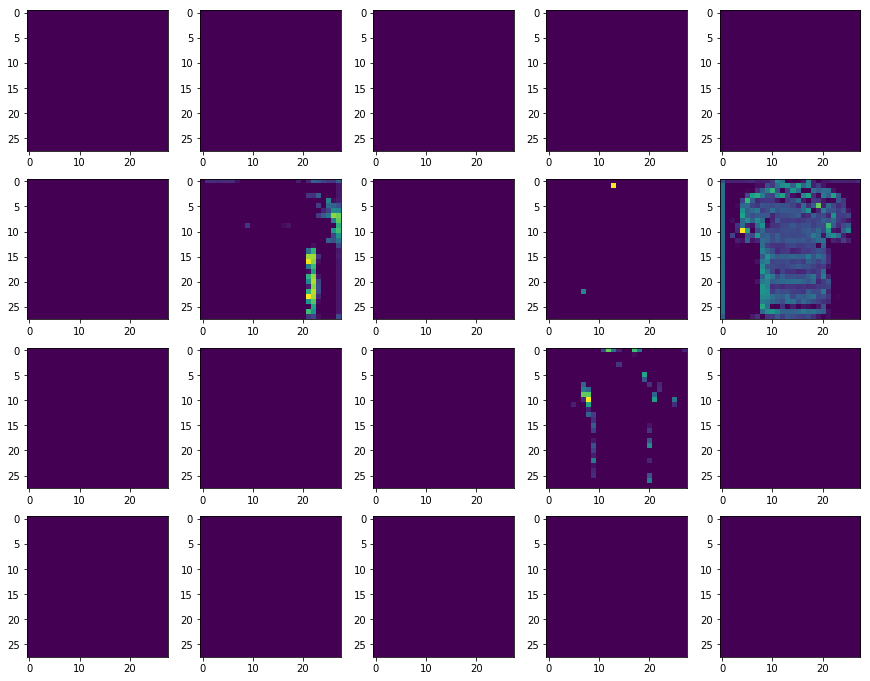

---------------------Layer= 2 Output-------------------------------------------
(1, 28, 28, 1)
1 5


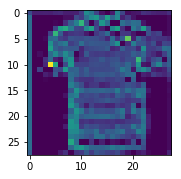

---------------------Layer= 3 Output-------------------------------------------
(1, 784)
784 5


IndexError: ignored

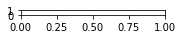

In [7]:
# Visualizing Output of Layers

# Instantiate a model with input and output
layerOutput = [layer.output for layer in model.layers[:]]
instModel = tf.keras.Model(inputs=model.input,outputs=layerOutput)

# Pick an image
imageIdx = 35 #2 #35
inImage = tImages[imageIdx].reshape([1,28,28,1])
print(np.shape(inImage))

# Predict with an image
activations = instModel.predict(inImage)

#  Plot the input image
plt.figure(1)
plt.imshow(inImage[0,:,:,0])
plt.show()

# Visualize output of layer0 (Conv. Layer)
layerIdx = 0
print("---------------------Layer= %d Output-------------------------------------------" 
      %(layerIdx))
print(np.shape(activations[layerIdx]))

plt.figure(figsize=(15,15))
colSize = 5
rowSize = np.shape(activations[layerIdx])
rowSize = rowSize[-1]
maxInt = int((rowSize/colSize) +1)
print(rowSize, colSize)

for _ in range(rowSize):
  plt.subplot(maxInt,colSize,_+1)
  plt.imshow(activations[layerIdx][0,:,:,_])
plt.show()

 # Visualize output of layer0 (Conv. Layer)
layerIdx = 1
print("---------------------Layer= %d Output-------------------------------------------" 
      %(layerIdx))
print(np.shape(activations[layerIdx]))

plt.figure(figsize=(15,15))
colSize = 5
rowSize = np.shape(activations[layerIdx])
rowSize = rowSize[-1]
maxInt = int((rowSize/colSize) +1)
print(rowSize, colSize)

for _ in range(rowSize):
  plt.subplot(maxInt,colSize,_+1)
  plt.imshow(activations[layerIdx][0,:,:,_])
plt.show()

 # Visualize output of layer0 (Conv. Layer)
layerIdx = 2
print("---------------------Layer= %d Output-------------------------------------------" 
      %(layerIdx))
print(np.shape(activations[layerIdx]))

plt.figure(figsize=(15,15))
colSize = 5
rowSize = np.shape(activations[layerIdx])
rowSize = rowSize[-1]
maxInt = int((rowSize/colSize) +1)
print(rowSize, colSize)

for _ in range(rowSize):
  plt.subplot(maxInt,colSize,_+1)
  plt.imshow(activations[layerIdx][0,:,:,_])
plt.show()

 # Visualize output of layer0 (Conv. Layer)
layerIdx = 3
print("---------------------Layer= %d Output-------------------------------------------" 
      %(layerIdx))
print(np.shape(activations[layerIdx]))

plt.figure(figsize=(15,15))
colSize = 5
rowSize = np.shape(activations[layerIdx])
rowSize = rowSize[-1]
maxInt = int((rowSize/colSize) +1)
print(rowSize, colSize)

for _ in range(rowSize):
  plt.subplot(maxInt,colSize,_+1)
  plt.imshow(activations[layerIdx][0,:,:,_])
plt.show()

In [14]:
instModel.output

[<tf.Tensor 'L0-Conv2D/Relu:0' shape=(?, 28, 28, 10) dtype=float32>,
 <tf.Tensor 'L1-Conv2D/Relu:0' shape=(?, 28, 28, 20) dtype=float32>,
 <tf.Tensor 'L2-Conv2D/Relu:0' shape=(?, 28, 28, 30) dtype=float32>,
 <tf.Tensor 'max_pooling2d/MaxPool:0' shape=(?, 14, 14, 30) dtype=float32>]

In [13]:
print(activations[-1])
print(label_dict[np.argmax(activations[-1])])
print(label_dict[tLabels[imageIdx]])

[[8.9900911e-01 7.9707790e-13 2.0870426e-05 2.6654036e-06 2.0737751e-07
  1.0473963e-18 1.0096717e-01 1.2731720e-21 3.8412530e-08 2.8811844e-18]]
T-shirt/top
T-shirt/top
